**File for converting splited audio to spectogram of MGCC**

In [0]:
import os
import tqdm as tqdm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
import librosa
from librosa import display
from scipy import signal
from soundfile import read
import progressbar

In [0]:
!pip install soundfile
!pip install progressbar2

In [0]:
!pip install python_speech_features

In [0]:
data_path = "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/cutted data/"
out_put_dir = "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/mfcc/"

In [0]:
def calc_fft(signal, rate):
  n = len(signal)
  frec = np.fft.rfftfreq(n, d = 1/rate)
  Y = abs(np.fft.rfft(signal)/n)
  return Y


In [0]:
def show_dpectogram(data_pathh):
  with open(data_pathh, 'rb') as filee:
    samples, sample_rate  = read(filee)
  fig = plt.figure(figsize = (300/96,200/96))
  ax = fig.add_subplot(1, 1, 1)
  try: 
    samples = np.mean(samples, axis = 1)
  except IndexError:
    samples = samples
  S = librosa.feature.melspectrogram(y = samples, sr = sample_rate)
  display.specshow(librosa.power_to_db(S))
  plt.show()

In [0]:
def show_mfcc(data_pathh):
  with open(data_pathh, 'rb') as filee:
    samples, sample_rate  = read(filee)
  fig = plt.figure(figsize = (300/96,200/96))
  ax = fig.add_subplot(1, 1, 1)
  try: 
    samples = np.mean(samples, axis = 1)
  except IndexError:
    samples = samples
  mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=40)
  librosa.display.specshow(mfccs, x_axis='time')
  plt.show()

In [0]:
def save_spectogramm(data_pathh,save_dir,name):
  with open(data_pathh, 'rb') as filee:
    samples, sample_rate  = read(filee)
  fig = plt.figure(figsize = (250/96,250/96))
  ax = fig.add_subplot(1, 1, 1)
  try: 
    samples = np.mean(samples, axis = 1)
  except IndexError:
    samples = samples
  S = librosa.feature.melspectrogram(y = samples, sr = sample_rate)
  display.specshow(librosa.power_to_db(S))
  plt.savefig(save_dir + name+'.png')
  plt.close('all')

In [0]:
def save_mfcc(data_pathh,save_dir,name):
  with open(data_pathh, 'rb') as filee:
    samples, sample_rate  = read(filee)
  fig = plt.figure(figsize = (250/96,250/96))
  ax = fig.add_subplot(1, 1, 1)
  try: 
    samples = np.mean(samples, axis = 1)
  except IndexError:
    samples = samples
  mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=40)
  librosa.display.specshow(mfccs, x_axis='time')
  plt.savefig(save_dir + name+'.png')
  plt.close('all')

In [0]:
# i = 0
# with os.scandir(data_path) as entries:
#     for entry in entries:
#        wav_file = data_path + entry.name
#        save_spectogramm(wav_file, save_dir = out_put_dir,name = file_name + str(i))
#        i+= 1


In [0]:
origin_data = np.array(os.listdir(data_path))
num = origin_data.shape[0]//5

data_part1, data_part2, data_part3, data_part4, data_part5 = np.split(origin_data, [num, 2*num, 3*num, 4*num])
data_part1.shape[0]

8038

In [0]:
def create_txt(arr, path, name):
  kk = 0
  with open(path + name, "w") as file:
    with progressbar.ProgressBar(max_value=arr.shape[0]) as bar:
      for i in arr:
        file.write(i)
        file.write("\n")
        kk += 1
        bar.update(kk)
  return None
    

    

In [0]:
create_txt(data_part1, "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/", "data_part1.txt")

100% (8038 of 8038) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


In [0]:
create_txt(data_part2, "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/", "data_part2.txt")
create_txt(data_part3, "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/", "data_part3.txt")
create_txt(data_part4, "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/", "data_part4.txt")
create_txt(data_part5, "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/", "data_part5.txt")

100% (8038 of 8038) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (8038 of 8038) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (8038 of 8038) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (8042 of 8042) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


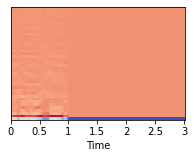

In [0]:
show_mfcc("/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/cutted data/cutted_data_2_12.wav")

In [0]:
save_mfcc("/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/cutted data/cutted_data_2_12.wav", "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/","sam")

In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/new project/new data/my data.csv")

In [0]:
data = data[data.columns[1:]]
data.head()

,filename,native_language,lable_count
0,dutch21,1,17
1,afrikaans1,1,9
2,arabic67,1,29
3,english392,0,15
4,farsi6,1,28


In [0]:
import pandas as pd
data.to_csv("/content/drive/My Drive/Colab Notebooks/new project/new data/my data.csv", index=False)

In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/new project/new data/my data.csv")
data.iloc[828]

filename           english268
native_language             0
lable_count                25
Name: 828, dtype: object

In [0]:
k = 0
with progressbar.ProgressBar(max_value=8038) as bar:
  with open("/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/data_part1.txt", "r") as file:
    for i in file :
      wav_file = data_path + i[:-1]
      save_mfcc(wav_file, save_dir = out_put_dir,name = i[:-5])
      bar.update(k)
      k += 1
  
    


100% (8038 of 8038) |####################| Elapsed Time: 1:11:34 Time:  1:11:34


In [0]:
k = 0
with progressbar.ProgressBar(max_value=8038) as bar:
  with open("/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/data_part2.txt", "r") as file:
    for i in file :
      wav_file = data_path + i[:-1]
      save_mfcc(wav_file, save_dir = out_put_dir,name = i[:-5])
      bar.update(k)
      k += 1

100% (8038 of 8038) |####################| Elapsed Time: 1:11:10 Time:  1:11:10


In [0]:
k = 0
with progressbar.ProgressBar(max_value=8038) as bar:
  with open("/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/data_part3.txt", "r") as file:
    for i in file :
      wav_file = data_path + i[:-1]
      save_mfcc(wav_file, save_dir = out_put_dir,name = i[:-5])
      bar.update(k)
      k += 1

100% (8038 of 8038) |####################| Elapsed Time: 1:13:16 Time:  1:13:16


In [0]:
k = 0
with progressbar.ProgressBar(max_value=8038) as bar:
  with open("/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/data_part4.txt", "r") as file:
    for i in file :
      wav_file = data_path + i[:-1]
      save_mfcc(wav_file, save_dir = out_put_dir,name = i[:-5])
      bar.update(k)
      k += 1

100% (8038 of 8038) |####################| Elapsed Time: 1:14:33 Time:  1:14:33


In [0]:
k = 0
with progressbar.ProgressBar(max_value=8042) as bar:
  with open("/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/data_part5.txt", "r") as file:
    for i in file :
      wav_file = data_path + i[:-1]
      save_mfcc(wav_file, save_dir = out_put_dir,name = i[:-5])
      bar.update(k)
      k += 1

100% (8042 of 8042) |####################| Elapsed Time: 1:11:32 Time:  1:11:32


In [0]:
k = 0
with progressbar.ProgressBar(max_value=data_part3.shape[0]) as bar:
  for i in data_part3:
    wav_file = data_path + i
    save_spectogramm(wav_file, save_dir = out_put_dir,name = file_name + str(j))
    j += 1
    bar.update(k)
    k += 1

100% (3196 of 3196) |####################| Elapsed Time: 0:33:51 Time:  0:33:51


In [0]:
show_dpectogram(data_pathh)

12784

In [0]:
with os.scantdir("/content/drive/My Drive/Colab Notebooks/new project/new data/recordings/spectogram data/") as file:
  file.name

18975